---

Independent Component Analysis (ICA)

---

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, FastICA

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)

In [3]:
# Step 1: generate independent signals
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Sinusoidal
s2 = np.sign(np.sin(3 * time))  # Square
s3 = np.random.normal(size=n_samples)  # Gaussian noise

S = np.c_[s1, s2, s3]
S /= S.std(axis=0)  # Standardize

In [4]:
# Step 2: mix signals
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = S @ A.T  # Mixed signals

In [5]:
# Step 3: Apply ICA
ica = FastICA(n_components=3, random_state=0)
S_ica = ica.fit_transform(X)

In [6]:
# Step 4: Apply PCA
pca = PCA(n_components=3)
S_pca = pca.fit_transform(X)

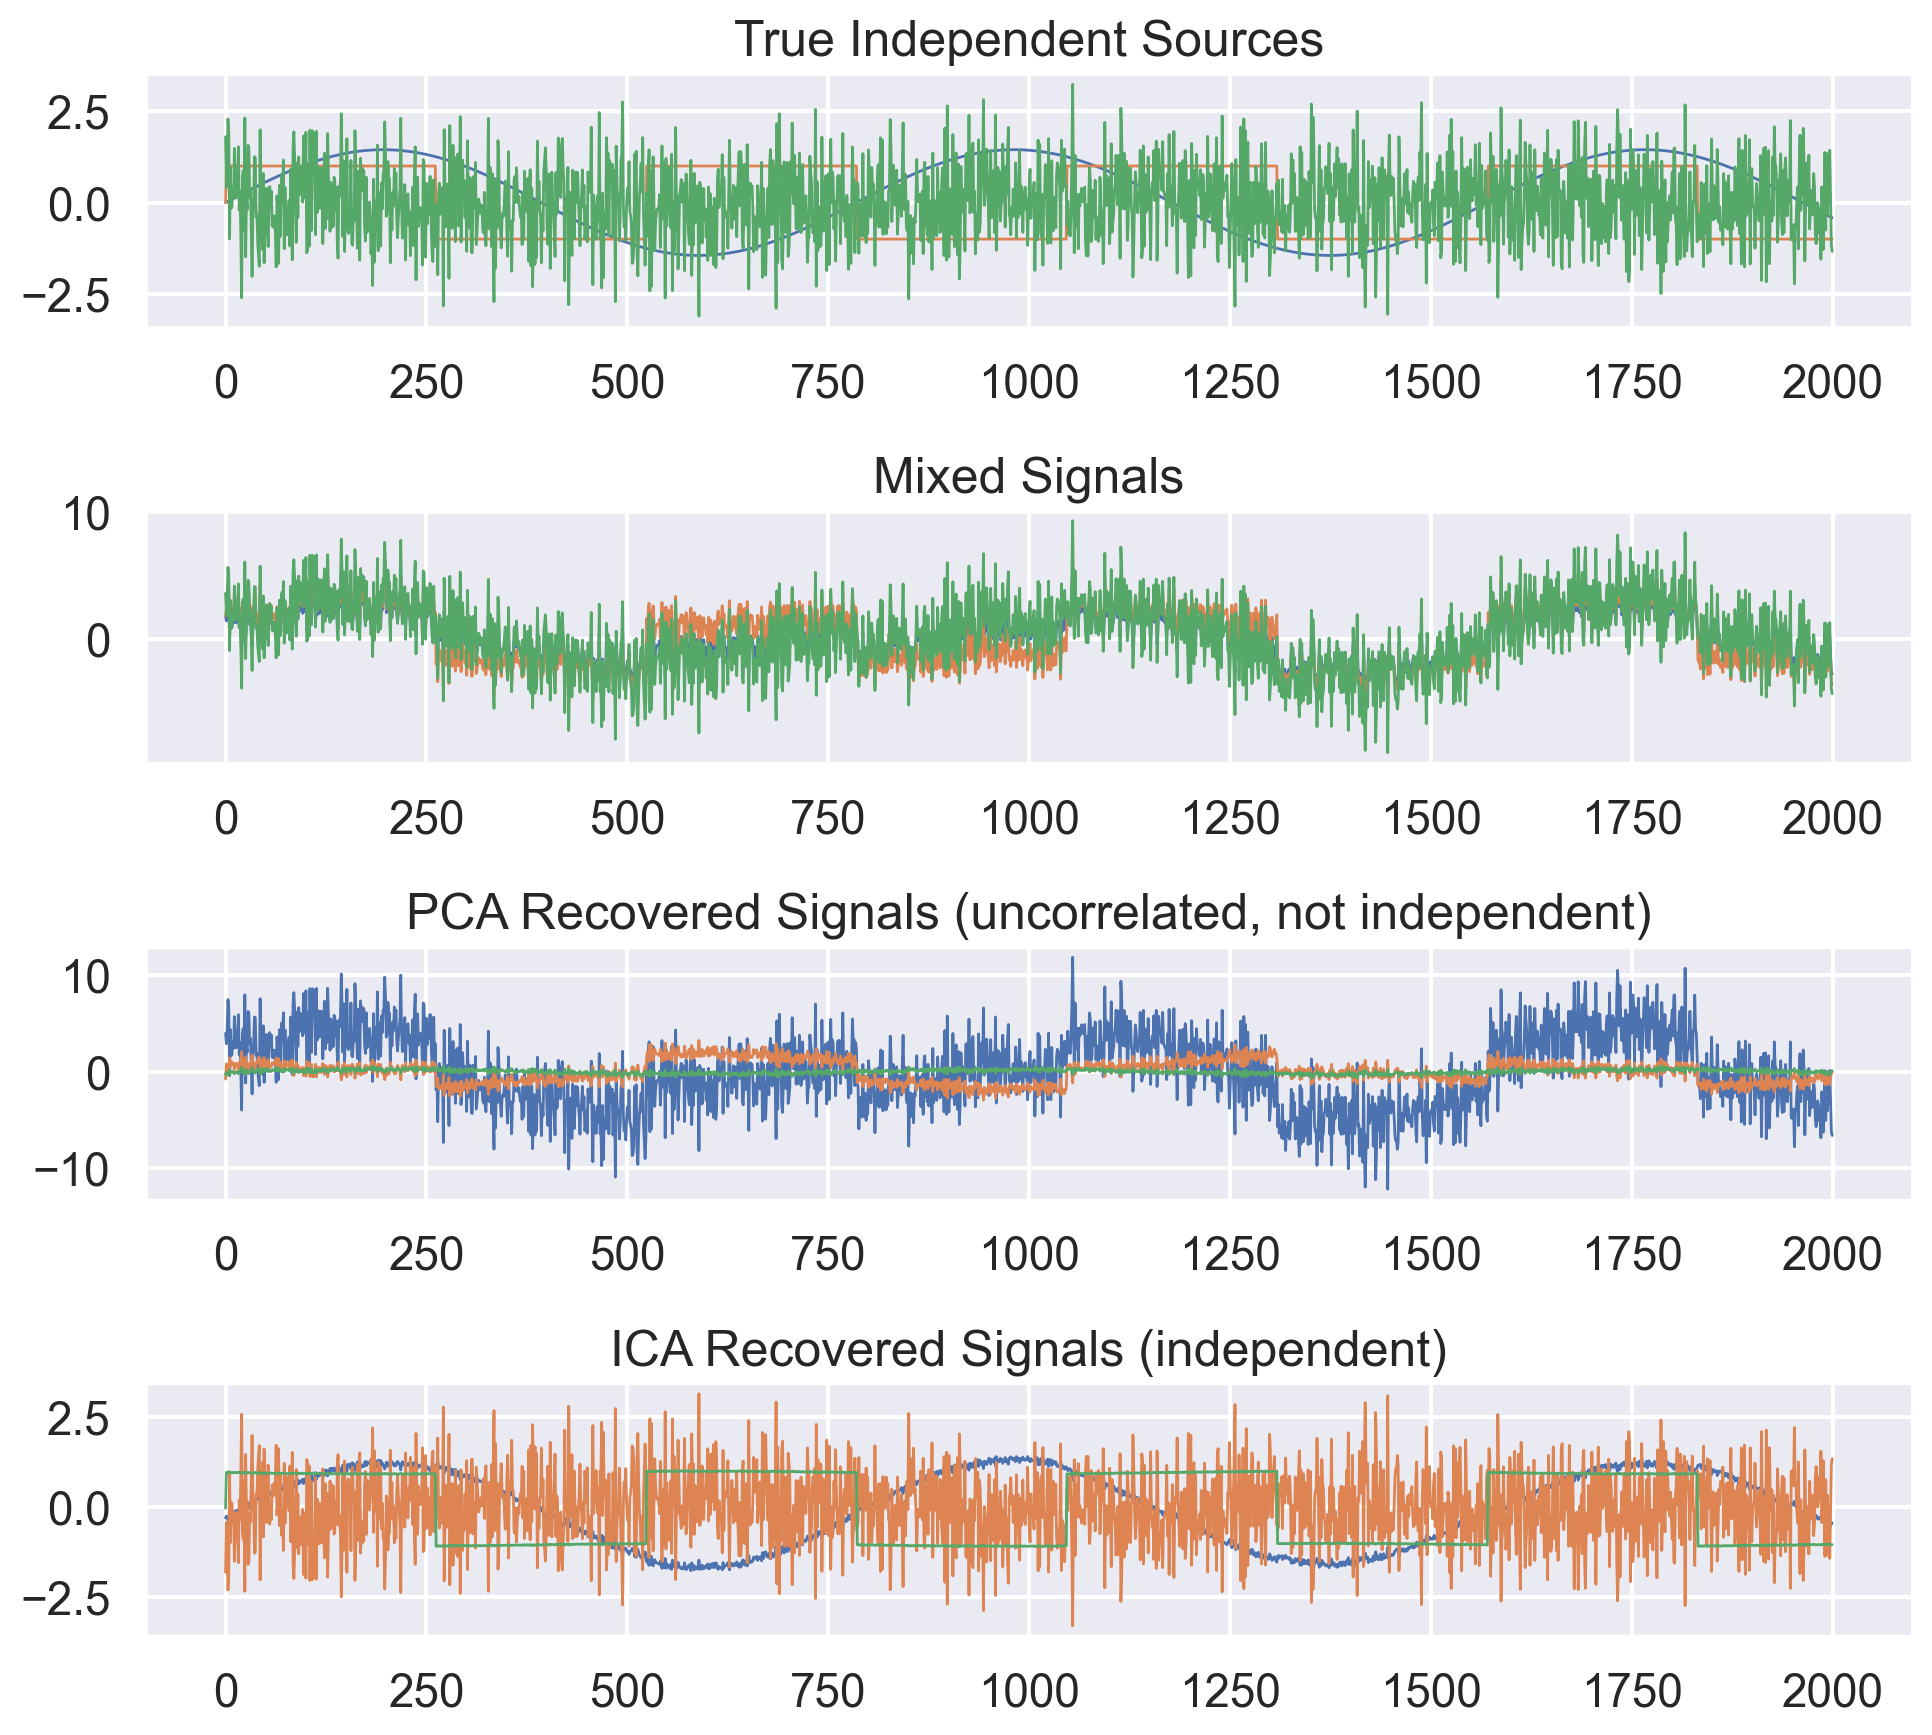

In [7]:
# Step 5: Plot comparison
fig, axes = plt.subplots(4, 1, figsize=(10, 9))

axes[0].plot(S, lw=1)
axes[0].set_title("True Independent Sources")

axes[1].plot(X, lw=1)
axes[1].set_title("Mixed Signals")

axes[2].plot(S_pca, lw=1)
axes[2].set_title("PCA Recovered Signals (uncorrelated, not independent)")

axes[3].plot(S_ica, lw=1)
axes[3].set_title("ICA Recovered Signals (independent)")

plt.tight_layout()
plt.show()